In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt

from sklearn import datasets
data = datasets.load_boston()

#print data.DESCR

In [6]:
data = datasets.load_boston()

In [8]:
#
print data.DESCR

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [9]:
print data.feature_names
print data.data[0]
print data.target[0]

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
[  6.32000000e-03   1.80000000e+01   2.31000000e+00   0.00000000e+00
   5.38000000e-01   6.57500000e+00   6.52000000e+01   4.09000000e+00
   1.00000000e+00   2.96000000e+02   1.53000000e+01   3.96900000e+02
   4.98000000e+00]
24.0


In [10]:
type(data)

sklearn.datasets.base.Bunch

In [12]:
print data.target[0]
#house price associated with housing value first row of data

24.0


In [14]:
import numpy as np
import pandas as pd


In [16]:
df = pd.DataFrame(data.data, columns=data.feature_names)

# Put the target (housing value -- MEDV) in another DataFrame
targets = pd.DataFrame(data.target, columns=["MEDV"])

# Take a look at the first few rows
print df.head()


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


In [17]:
print targets.head()

   MEDV
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


In [19]:
df['RM'].describe()

count    506.000000
mean       6.284634
std        0.702617
min        3.561000
25%        5.885500
50%        6.208500
75%        6.623500
max        8.780000
Name: RM, dtype: float64

In [21]:
targets['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

In [22]:
import statsmodels.api as sm

X = df["RM"]
y = targets["MEDV"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()
# every coef extra bedroom the 3.65 increases value?
#around 3.6534
# y = 3.654X

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     4615.
Date:                Tue, 11 Oct 2016   Prob (F-statistic):          3.74e-256
Time:                        14:54:06   Log-Likelihood:                -1747.1
No. Observations:                 506   AIC:                             3496.
Df Residuals:                     505   BIC:                             3500.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
RM             3.6534      0.054     67.930      0.000         3.548     3.759
==============================================================================
Omnibus:                       83.295   Durbin-Watson:                   0.493
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.507
Skew:                           0.955   Prob(JB):                     7.65e-34
Kurtosis:                       4.894   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
#predictions
model.predict([4])
# 4 bed rooms

array([ 14.6134016])

In [28]:
predictions

array([ 24.02077888,  23.45816292,  26.24932262,  25.5661461 ,
        26.11049531,  23.49104307,  21.9639426 ,  22.54847867,
        20.5720161 ,  21.9347158 ,  23.2974155 ,  21.95298255,
        21.51458051,  21.73378153,  22.27082404,  21.31364623,
        21.68263462,  21.8835689 ,  19.93267978,  20.92273774,
        20.34916173,  21.79223514,  22.43887816,  21.23692588,
        21.64244777,  20.45510889,  21.23692588,  22.09180987,
        23.72851085,  24.38246057,  20.87159084,  22.18314363,
        21.73743488,  20.82775063,  22.27082404,  21.67532792,
        21.33921969,  21.37209984,  21.79588849,  24.09384589,
        25.66113321,  24.73318221,  22.53751862,  22.69095933,
        22.17218358,  20.75833697,  21.13828541,  22.02970291,
        19.72443881,  20.46606894,  21.78492844,  22.3402377 ,
        23.78696445,  21.9127957 ,  21.51092716,  26.48313705,
        23.3193356 ,  24.90123633,  22.44983821,  21.65340782,
        20.97388465,  21.79588849,  23.58603018,  24.70

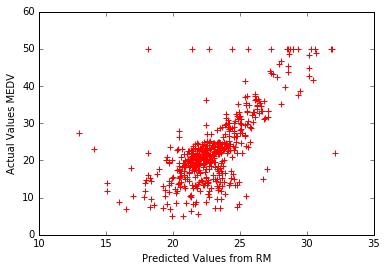

MSE: 270070.558471


In [27]:
# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", model.mse_model
#plt.scatter?  pull up plot stream

In [30]:
#import statsmodels.api as sm

x = df["RM"]
x = sm.add_constant(x)
x.head()

# Note the difference in argument order
# model = sm.OLS(y, X).fit()
# predictions = model.predict(X)

# # Print out the statistics
# model.summary()

,const,RM
0,1.0,6.575
1,1.0,6.421
2,1.0,7.185
3,1.0,6.998
4,1.0,7.147


In [32]:
y=targets['MEDV']
x = sm.add_constant(x)
predictions = model.predict(x)

model.summary()

ValueError: shapes (506,2) and (1,) not aligned: 2 (dim 1) != 1 (dim 0)

In [34]:
import statsmodels.api as sm

X = df["RM"]
X = sm.add_constant(X)
y = targets["MEDV"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()
#new model looks like y = 34.67 + 9.10
#

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 11 Oct 2016   Prob (F-statistic):           2.49e-74
Time:                        15:15:54   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000       -39.877   -29.465
RM             9.1021      0.419     21.722      0.000         8.279     9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

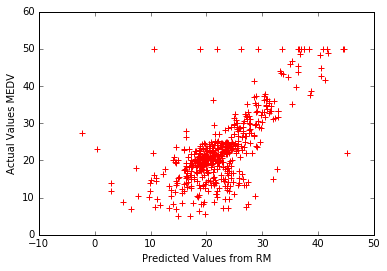

MSE: 20654.4162188


In [35]:
# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from RM")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", model.mse_model

In [42]:
#model.predict([1,0])
# one room -35K
model.predict([1,9])
#nine rooms

array([ 47.24836005])

In [43]:
x = df[["LSTAT"]]
y = targets["MEDV"]

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()
#1 increase in increase by 1.12

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 11 Oct 2016   Prob (F-statistic):           2.49e-74
Time:                        15:21:24   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000       -39.877   -29.465
RM             9.1021      0.419     21.722      0.000         8.279     9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

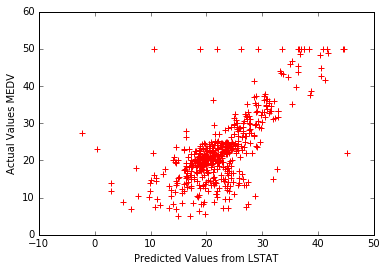

MSE: 20654.4162188


In [44]:
# Plot the model
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from LSTAT")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", model.mse_model
#this model did not work

In [46]:
x = df[['RM','LSTAT']]
y = targets["MEDV"]

# # Note the difference in argument order
# model = sm.OLS(y, X).fit()
# predictions = model.predict(X)

# # Print out the statistics
# model.summary()
# #1 increase in increase by 1.12
x.head()

,RM,LSTAT
0,6.575,4.98
1,6.421,9.14
2,7.185,4.03
3,6.998,2.94
4,7.147,5.33


In [48]:
# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()
#y = 4.9x (rooms) -0.65* (lower income people in are)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 11 Oct 2016   Prob (F-statistic):           2.49e-74
Time:                        15:24:56   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000       -39.877   -29.465
RM             9.1021      0.419     21.722      0.000         8.279     9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
x = df[['RM','LSTAT']]
x=sm.add_constant(x)
y = targets["MEDV"]
x.head()

,const,RM,LSTAT
0,1,6.575,4.98
1,1,6.421,9.14
2,1,7.185,4.03
3,1,6.998,2.94
4,1,7.147,5.33


In [51]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()
#model y=-1.365 + 5.2(rm) - .64(lstat)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 11 Oct 2016   Prob (F-statistic):           2.49e-74
Time:                        15:28:17   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000       -39.877   -29.465
RM             9.1021      0.419     21.722      0.000         8.279     9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

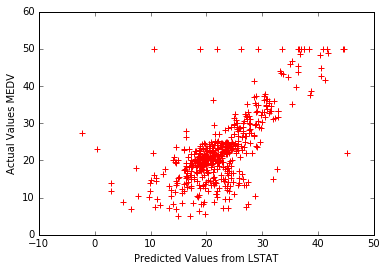

MSE: 20654.4162188


In [52]:
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from LSTAT")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", model.mse_model

In [54]:
#step 1
x = df[['AGE','DIS']]
x=sm.add_constant(x)
y = targets["MEDV"]
x.head()

,const,AGE,DIS
0,1,65.2,4.0900
1,1,78.9,4.9671
2,1,61.1,4.9671
3,1,45.8,6.0622
4,1,54.2,6.0622


In [55]:
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Tue, 11 Oct 2016   Prob (F-statistic):           2.49e-74
Time:                        15:33:01   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const        -34.6706      2.650    -13.084      0.000       -39.877   -29.465
RM             9.1021      0.419     21.722      0.000         8.279     9.925
==============================================================================
Omnibus:                      102.585   Durbin-Watson:                   0.684
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              612.449
Skew:                           0.726   Prob(JB):                    1.02e-133
Kurtosis:                       8.190   Cond. No.                         58.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
#step 1
x = df
x=sm.add_constant(x)
y = targets["MEDV"]
x.head()

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,1,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,1,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,1,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,1,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [69]:
#STEP 2
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 11 Oct 2016   Prob (F-statistic):          6.95e-135
Time:                        15:37:17   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         36.4911      5.104      7.149      0.000        26.462    46.520
CRIM          -0.1072      0.033     -3.276      0.001        -0.171    -0.043
ZN             0.0464      0.014      3.380      0.001         0.019     0.073
INDUS          0.0209      0.061      0.339      0.735        -0.100     0.142
CHAS           2.6886      0.862      3.120      0.002         0.996     4.381
NOX          -17.7958      3.821     -4.658      0.000       -25.302   -10.289
RM             3.8048      0.418      9.102      0.000         2.983     4.626
AGE            0.0008      0.013      0.057      0.955        -0.025     0.027
DIS           -1.4758      0.199     -7.398      0.000        -1.868    -1.084
RAD            0.3057      0.066      4.608      0.000         0.175     0.436
TAX           -0.0123      0.004     -3.278      0.001        -0.020    -0.005
PTRATIO       -0.9535      0.131     -7.287      0.000        -1.211    -0.696
B              0.0094      0.003      3.500      0.001         0.004     0.015
LSTAT         -0.5255      0.051    -10.366      0.000        -0.625    -0.426
==============================================================================
Omnibus:                      178.029   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              782.015
Skew:                           1.521   Prob(JB):                    1.54e-170
Kurtosis:                       8.276   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

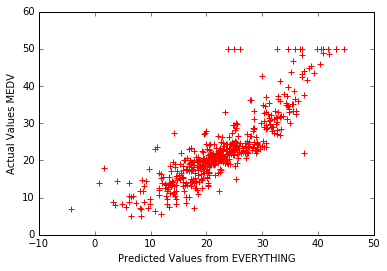

MSE: 2433.53993314


In [70]:
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from EVERYTHING")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", model.mse_model

In [81]:
import patsy

# First let's add the targets to our data frame
df["MEDV"] = targets["MEDV"]
#medv is not longer a target it is a column
#df.head()

y, x = patsy.dmatrices("MEDV ~ RM + LSTAT", data=df)
#y = medv and x is the other after ~
print x[0:5, :]
print y[0:5, :]
#THE FORMULA IS y = a +B(Rm) + B(LSTAT)
#constant for x then second part is y

[[ 1.     6.575  4.98 ]
 [ 1.     6.421  9.14 ]
 [ 1.     7.185  4.03 ]
 [ 1.     6.998  2.94 ]
 [ 1.     7.147  5.33 ]]
[[ 24. ]
 [ 21.6]
 [ 34.7]
 [ 33.4]
 [ 36.2]]


In [82]:
y, x = patsy.dmatrices("MEDV ~ LSTAT + I(LSTAT**2)", data=df)
print x[0:5, :]
#not straight line see if curved

[[  1.       4.98    24.8004]
 [  1.       9.14    83.5396]
 [  1.       4.03    16.2409]
 [  1.       2.94     8.6436]
 [  1.       5.33    28.4089]]


In [83]:
#STEP 2
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Tue, 11 Oct 2016   Prob (F-statistic):          1.56e-112
Time:                        15:51:24   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept        42.8620      0.872     49.149      0.000        41.149    44.575
LSTAT            -2.3328      0.124    -18.843      0.000        -2.576    -2.090
I(LSTAT ** 2)     0.0435      0.004     11.628      0.000         0.036     0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

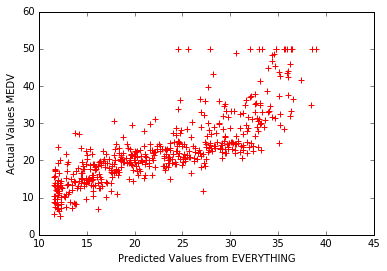

MSE: 13684.5261283


In [84]:
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from EVERYTHING")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", model.mse_model

In [85]:
y, x = patsy.dmatrices("MEDV ~ LSTAT + np.power(LSTAT,2)", data=df)
print x[0:5, :]

[[  1.       4.98    24.8004]
 [  1.       9.14    83.5396]
 [  1.       4.03    16.2409]
 [  1.       2.94     8.6436]
 [  1.       5.33    28.4089]]


In [86]:
#STEP 2
model = sm.OLS(y, x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Tue, 11 Oct 2016   Prob (F-statistic):          1.56e-112
Time:                        15:52:07   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept             42.8620      0.872     49.149      0.000        41.149    44.575
LSTAT                 -2.3328      0.124    -18.843      0.000        -2.576    -2.090
np.power(LSTAT, 2)     0.0435      0.004     11.628      0.000         0.036     0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
from patsy import dmatrix, demo_data

data = demo_data("a", nlevels=4)
print data
dmatrix("a", data)

{'a': ['a1', 'a2', 'a3', 'a4', 'a1', 'a2', 'a3', 'a4']}


DesignMatrix with shape (8, 4)
  Intercept  a[T.a2]  a[T.a3]  a[T.a4]
          1        0        0        0
          1        1        0        0
          1        0        1        0
          1        0        0        1
          1        0        0        0
          1        1        0        0
          1        0        1        0
          1        0        0        1
  Terms:
    'Intercept' (column 0)
    'a' (columns 1:4)

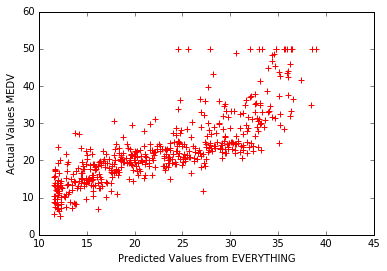

MSE: 13684.5261283


In [88]:
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from EVERYTHING")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", model.mse_model


In [89]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [92]:
crim_indu = patsy.dmatrices("MEDV ~ CRIM+ INDUS", data=df)
crim_indus =sm.OLS(y,x).fit()
predictions = model.predict(x)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Tue, 11 Oct 2016   Prob (F-statistic):          1.56e-112
Time:                        16:12:39   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------------
Intercept             42.8620      0.872     49.149      0.000        41.149    44.575
LSTAT                 -2.3328      0.124    -18.843      0.000        -2.576    -2.090
np.power(LSTAT, 2)     0.0435      0.004     11.628      0.000         0.036     0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

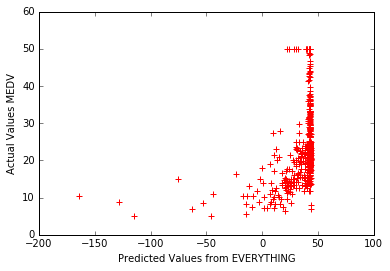

MSE: 13684.5261283


In [93]:
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from EVERYTHING")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", model.mse_model

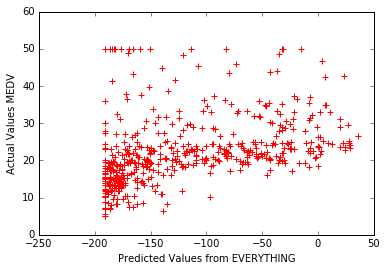

MSE: 13684.5261283


In [99]:
y, x = patsy.dmatrices("MEDV ~ AGE + CHAS", data=df)
crim_indus =sm.OLS(y,x).fit()
predictions = model.predict(x)
#model.summary()
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from EVERYTHING")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", model.mse_model

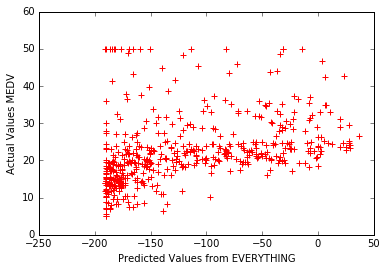

MSE: 3084.4742234


In [115]:
y, x = patsy.dmatrices("MEDV ~ AGE + DIS", data=df)
crim_indus =sm.OLS(y,x).fit()
predictions = model.predict(x)
#model.summary()
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from EVERYTHING")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", crim_indus.mse_model

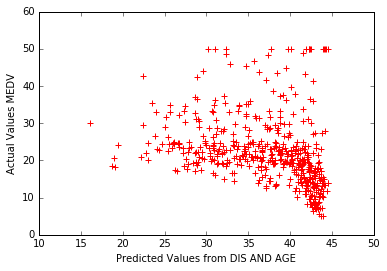

MSE: 3084.4742234


In [116]:
y, x = patsy.dmatrices("MEDV ~ DIS + AGE", data=df)
crim_indus =sm.OLS(y,x).fit()
predictions = model.predict(x)
#model.summary()
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from DIS AND AGE")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", crim_indus.mse_model

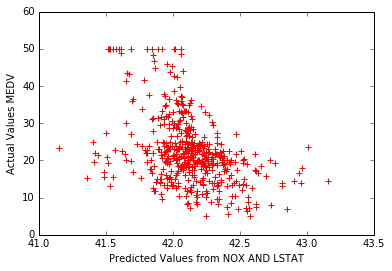

MSE: 11624.3550741


In [113]:
y, x = patsy.dmatrices("MEDV ~ NOX + LSTAT", data=df)
crim_indus =sm.OLS(y,x).fit()
predictions = model.predict(x)
#model.summary()
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from NOX AND LSTAT")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", crim_indus.mse_model

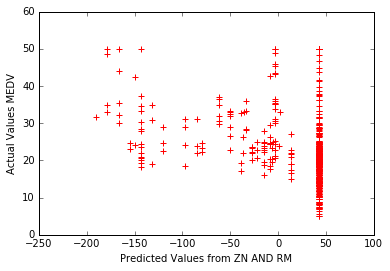

MSE: 10814.4445607


In [111]:
y, x = patsy.dmatrices("MEDV ~ ZN + RM", data=df)
crim_indus =sm.OLS(y,x).fit()
predictions = model.predict(x)
#model.summary()
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from ZN AND RM")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", crim_indus.mse_model

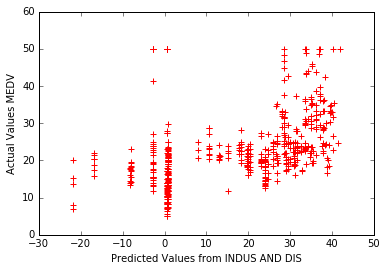

MSE: 5364.52861213


In [112]:
y, x = patsy.dmatrices("MEDV ~ INDUS + DIS", data=df)
crim_indus =sm.OLS(y,x).fit()
predictions = model.predict(x)
#model.summary()
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from INDUS AND DIS")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:", crim_indus.mse_model

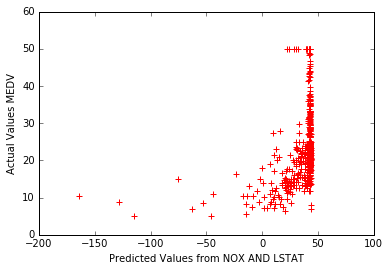

MSE: 5921.17051979


In [110]:
y, x = patsy.dmatrices("MEDV ~ CRIM + INDUS", data=df)
crim_indus =sm.OLS(y,x).fit()
predictions = model.predict(x)
#model.summary()
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from NOX AND LSTAT")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:",crim_indus.mse_model

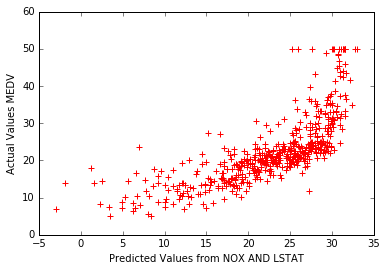

MSE: 7804.59117066


In [121]:
y, x = patsy.dmatrices("MEDV ~ CRIM  + NOX + LSTAT", data=df)
crim_indus =sm.OLS(y,x).fit()
predictions = crim_indus.predict(x)
#model.summary()
plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
plt.xlabel("Predicted Values from NOX AND LSTAT")
plt.ylabel("Actual Values MEDV")
plt.show()
print "MSE:",crim_indus.mse_model

In [120]:

l = list(data.feature_names)
l2 = []
for i in range(0, len(l)):
   for j in range(0, len(l)):
       if i > j:
           l2.append(str(l[j])+" + "+str(l[i]))
for i in range(0, len(l2)):
   y, x = patsy.dmatrices("MEDV ~ "+l2[i], data=df)
   model = sm.OLS(y, x).fit()
   predictions = model.predict(x)
   model.summary()
   plt.scatter(predictions, y, s=30, c='r', marker='+', zorder=10)
   plt.xlabel("Predicted Values from " + l2[i])
   plt.ylabel("Actual Values MEDV")
   plt.show()
   print "MSE:", model.mse_model

AttributeError: 'dict' object has no attribute 'feature_names'